In [1]:
import numpy as np
np.random.seed(10)
from POD import generate_pod_bases, plot_pod_modes
from GP import galerkin_projection

In [2]:
%matplotlib inline
import seaborn as sns
import re
import matplotlib as mpl
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as mtick
mpl.rcParams['ps.useafm'] = True
#mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True
mpl.rc('text', usetex=True) 
mpl.rcParams['text.latex.unicode']=True
mpl.use( "cairo", warn=False, force=True)
print(mpl.pyplot.get_backend())

mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage[T1]{fontenc}',
       r'\usepackage[default]{gillius}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]  


def init_plotting():
    plt.rcParams['figure.figsize'] = (8, 5)
    plt.rcParams['font.size'] = 20
    print(plt.rcParams['font.family'] )
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = 0.9*plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
#    print(plt.rcParams['savefig.dpi'])
#    plt.rcParams['savefig.dpi'] = 2*plt.rcParams['savefig.dpi']
    plt.rcParams['xtick.minor.visible']=False
    plt.rcParams['ytick.minor.visible']=False
    plt.rcParams['xtick.major.size'] = 6
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 2
    plt.rcParams['xtick.minor.width'] = 2
    plt.rcParams['ytick.major.size'] = 6
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 2
    plt.rcParams['ytick.minor.width'] = 2
    plt.rcParams['ytick.color'] = "black"#"#808080"
    plt.rcParams['xtick.color'] = "black"#"#808080"
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    #ax.tick_params(direction='out', length=6, width=2, colors='r',
    #           grid_color='r', grid_alpha=0.5)
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 2

init_plotting()

def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""
    # Retrieve a list of all current figures.
    figures = [x for x in mpl._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            
            ax.spines['left'].set_color("#808080")
            ax.spines['bottom'].set_color("#808080")
            ax.spines['right'].set_color("#808080")
            ax.spines['top'].set_color("#808080")
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
    
            ax.spines['top'].set_linewidth(0.1)
            ax.spines['top'].set_linestyle(':')
            ax.spines['right'].set_linewidth(0.1)
            ax.spines['right'].set_linestyle(':')

hide_spines()

cairo
['sans-serif']


/home/rmlans/anaconda3/envs/deephyper_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  import sys
/home/rmlans/anaconda3/envs/deephyper_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  


In [3]:
Rnum = 3000.0
x = np.linspace(0.0,1.0,num=128)
dx = 1.0/np.shape(x)[0]

tsteps = np.linspace(0.0,2.0,num=50)
dt = 2.0/np.shape(tsteps)[0]

In [4]:
def exact_solution(t):
    t0 = np.exp(Rnum/8.0)

    return (x/(t+1))/(1.0+np.sqrt((t+1)/t0)*np.exp(Rnum*(x*x)/(4.0*t+4)))

def collect_snapshots():
    snapshot_matrix = np.zeros(shape=(np.shape(x)[0],np.shape(tsteps)[0]))

    trange = np.arange(np.shape(tsteps)[0])
    for t in trange:
        snapshot_matrix[:,t] = exact_solution(tsteps[t])[:]

    snapshot_matrix_mean = np.mean(snapshot_matrix,axis=1)
    snapshot_matrix = (snapshot_matrix.transpose()-snapshot_matrix_mean).transpose()

    return snapshot_matrix, snapshot_matrix_mean

In [5]:
# Snapshot collection
sm, sm_mean = collect_snapshots() # Note that columns of a snapshot/state are time always and a state vector is a column vector

/home/rmlans/anaconda3/envs/deephyper_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


/home/rmlans/Desktop/ROMS/CAE_LSTM_ROMS/POD_Burgers/POD.py:17: RuntimeWarning: invalid value encountered in sqrt
  phi[:,trange] = phi[:,trange]/np.sqrt(w[:])


L2 error for 2 modes: 0.0061203501122364425
L2 error for 5 modes: 0.012443142697989835
L2 error for 10 modes: 0.0010629414976028955
L2 error for 20 modes: 0.00040997914812420733
L2 error for 30 modes: 8.333631788553781e-05


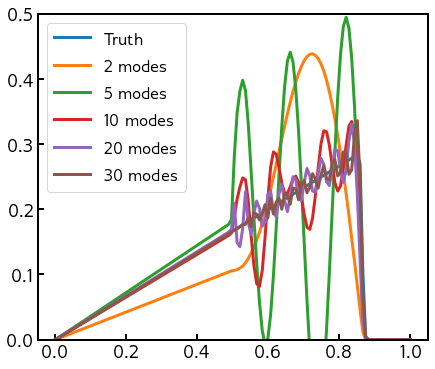

In [6]:
modal_list = [2,5,10,20,30]

true_field = sm_mean+sm[:,-1]
#Visualization
plt.figure(figsize=(7,6))
plt.plot(x[:],true_field,label='Truth',linewidth=3)

for mode in modal_list:
    num_modes = mode
    # Truth
    phi_trunc, cf_trunc = generate_pod_bases(sm,num_modes,tsteps)
    perfect_output = cf_trunc[:,-1] 
    # POD Galerkin
    output_state_gp, state_tracker_gp = galerkin_projection(phi_trunc,cf_trunc,sm_mean,tsteps,Rnum,dt,dx,num_modes)
    pred_field = sm_mean+(np.matmul(phi_trunc,output_state_gp))
    plt.plot(x[:],pred_field[:],label=str(mode)+' modes',linewidth=3)
    
    
    print('L2 error for '+str(mode)+' modes:',np.sum((true_field-pred_field)**2/128))
    
    
plt.legend()
plt.ylim((0.0,0.5))
plt.show()